# **Consumer Electronics Sales Forecasting**

## **Focus:** Sales forecasting for fast moving consumer electronics to optimize inventory management and maximize profitability

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Import Data

In [2]:
df = pd.read_csv('/Users/macintosh/Desktop/Forecasting-Sales-for-Fast-Moving-Consumer-Electronics/DataCleaning/ElectroTech Forecasting Data.csv')

In [3]:
df 

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81
...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055552,53.747320,Spec_A,Long-Battery-Life,182
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287


In [4]:
df['Category'].value_counts()

Category
Tablet         34370
Accessories    34041
Smartphone     33980
Laptop         33802
Name: count, dtype: int64

A quick overview of what each column represents to note from this: 
- **Product_ID**: This ID distinguish products from each others. It contains integer values
- **Category**: This is the product category, there are laptop, tablet, smartphone and accessories 
- **Price**: This is the price of the product in US dollars
- **Date**: The date of the sale of the product
- **Season**: The season of the year the product was sold 
- **Market_Trend_Index**: Represents external factors affecting the electronic industry
- **Competitor_Acivity_Score**: Measures the influence of the company's competitors in the market
- **Consumer_Confidence_Index**: Measures consumer confidence at that particular date
- **Product_Specifications**: Specific information on the products themselves

### Data Preparation

- Check for missing values
- Check for duplicate
- Deal with datatypes 
- Check data distribution to account for outliers and deal with these outliers 

In [5]:
print(f"{df.isnull().sum()}\n")
print(f"{df.duplicated().sum()}\n")
print(f"{df.dtypes}\n")

Product_ID                   0
Category                     0
Price                        0
Date                         0
Season                       0
Market_Trend_Index           0
Competitor_Activity_Score    0
Consumer_Confidence_Index    0
Product_Specification_1      0
Product_Specification_2      0
Sales_Volume                 0
dtype: int64

0

Product_ID                     int64
Category                      object
Price                        float64
Date                          object
Season                        object
Market_Trend_Index           float64
Competitor_Activity_Score    float64
Consumer_Confidence_Index    float64
Product_Specification_1       object
Product_Specification_2       object
Sales_Volume                   int64
dtype: object



In [6]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Date'].dtype

dtype('<M8[ns]')

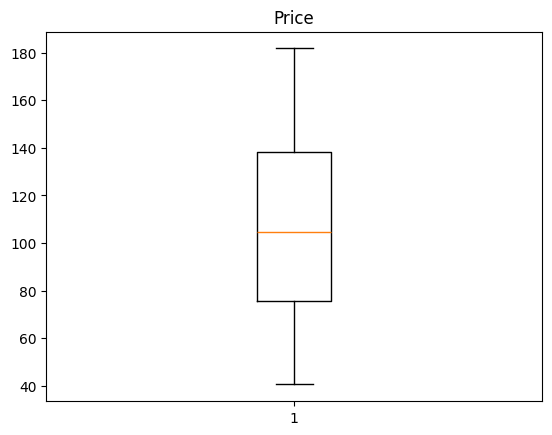

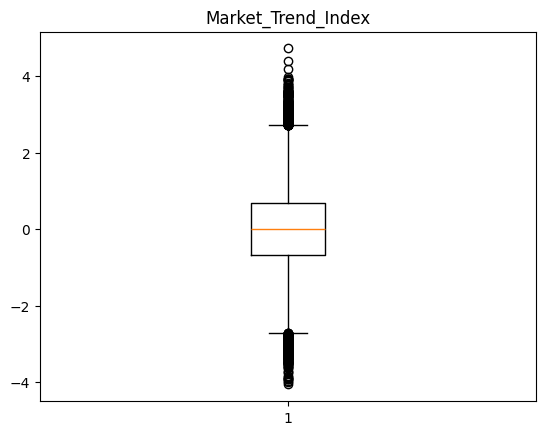

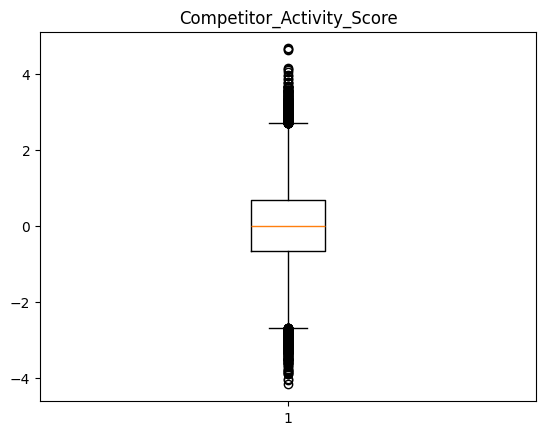

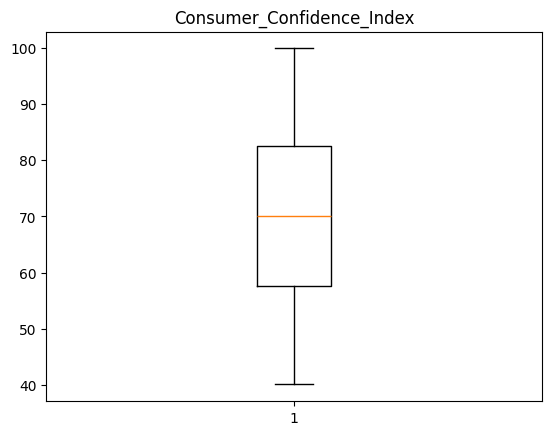

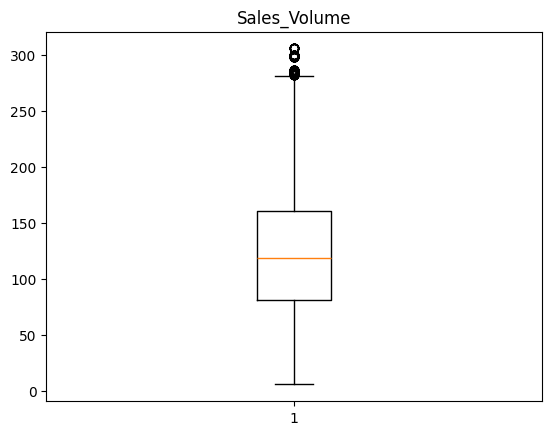

In [7]:
outlier_columns = df.select_dtypes(exclude=['object', 'datetime']).iloc[0:, 1:].columns.to_list()

for columns in outlier_columns: 
    plt.boxplot(df[columns])
    plt.title(columns)
    plt.show()

In [10]:
outlier_columns = df.select_dtypes(exclude=['object', 'datetime']).iloc[0:, 1:].columns.to_list()

for columns in outlier_columns: 
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[columns]=np.where(df[columns]< lower_bound, lower_bound, df[columns])
    df[columns]=np.where(df[columns]> upper_bound, upper_bound, df[columns])

### Save Preprocessed Data For Proper Exploratory Data Analysis